In [1]:
import numpy as np
import pandas as pd
from zipfile import ZipFile
from matplotlib import pyplot as plt
import seaborn as sbn
from tabulate import tabulate
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
RUTA_DATOS='datos/'
RUTA_IMAGENES='imagenes/'
RUTA_HTMLS='HTML/'

In [3]:
# leer el dataset
filename = f'{RUTA_DATOS}/export_dataset_renamed.csv'

In [4]:
df_datos = pd.read_csv(filename).drop(['Unnamed: 0'], axis=1)

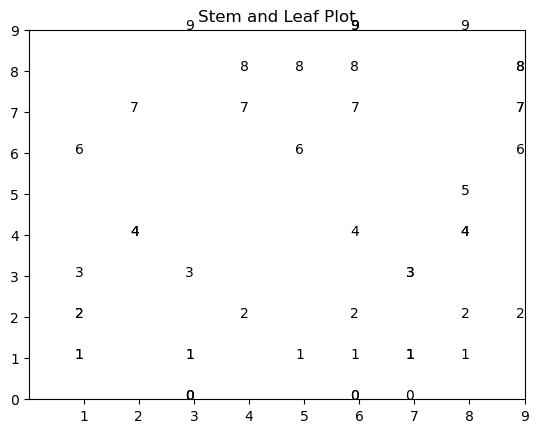

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Generar datos aleatorios
np.random.seed(42)
data = np.random.randint(10, 100, 50)

# Obtener los tallos y las hojas
stems = [int(x // 10) for x in data]
leaves = [int(x % 10) for x in data]

# Crear el gráfico de tallo y hojas
fig, ax = plt.subplots()
ax.set_title('Stem and Leaf Plot')

for stem, leaf in zip(stems, leaves):
    ax.text(stem, leaf, str(leaf), ha='right')

ax.set_yticks(range(10))
ax.set_xticks(sorted(set(stems)))

plt.show()

In [6]:
import plotly.express as px
import pandas as pd
import numpy as np

# Generar datos aleatorios
np.random.seed(42)
data = np.random.randint(10, 100, 50)

# Obtener los tallos y las hojas
stems = [int(x // 10) for x in data]
leaves = [int(x % 10) for x in data]

# Crear un DataFrame con los datos generados
df = pd.DataFrame({'Stem': stems, 'Leaf': leaves})

# Crear un gráfico de barras con Plotly Express
fig = px.bar(df, x='Stem', y='Leaf', title='Stem and Leaf Plot', text='Leaf',
             labels={'Leaf': 'Leaves', 'Stem': 'Stems'},
             category_orders={'Stem': sorted(set(stems))})

# Mostrar el gráfico
fig.show()

In [7]:
data = df_datos.columns.values.tolist()

In [8]:
stems = [i for i in range(len(data))]

In [9]:
# Crear un DataFrame con los datos generados
df = pd.DataFrame({'Campo': stems, 'columna': data})

In [10]:
# Crear un gráfico de barras con Plotly Express
fig = px.bar(df, x='Campo',  title='Campos del dataset', text='columna',
             labels={'columna': 'Nombre', 'Campo': 'Campos'},
             category_orders={'Campo': sorted(set(stems))},             
             color_discrete_sequence=['lightgray'])

# Apagar el eje y (ocultar el eje y)
fig.update_yaxes(visible=False)
# Mostrar el gráfico
fig.show()

In [11]:
fig.write_image('imagenes/campos_dataset_factores_riesgo.png')

In [12]:
data

['Est.Salud',
 'Chequeo',
 'Ejercicio',
 'Enf.Cardiaca',
 'Canc.Piel',
 'Otr.Canc',
 'Depresion',
 'Diabetes',
 'Artritis',
 'Sexo',
 'Edad',
 'Altura',
 'Peso',
 'IMC',
 'Hist.Fumador',
 'Consum.Alcohol',
 'Consum.Fruta',
 'Consum.Veg.Verdes',
 'Consumo.Patatas.Fritas']

In [13]:
df_datos.head()

Est.Salud                  Chequeo Ejercicio Enf.Cardiaca Canc.Piel  \
0       Poor  Within the past 2 years        No           No        No   
1  Very Good     Within the past year        No          Yes        No   
2  Very Good     Within the past year       Yes           No        No   
3       Poor     Within the past year       Yes          Yes        No   
4       Good     Within the past year        No           No        No   

  Otr.Canc Depresion Diabetes Artritis    Sexo   Edad  Altura   Peso    IMC  \
0       No        No       No      Yes  Female  70-74   150.0  32.66  14.54   
1       No        No      Yes       No  Female  70-74   165.0  77.11  28.29   
2       No        No      Yes       No  Female  60-64   163.0  88.45  33.47   
3       No        No      Yes       No    Male  75-79   180.0  93.44  28.73   
4       No        No       No       No    Male    80+   191.0  88.45  24.37   

  Hist.Fumador  Consum.Alcohol  Consum.Fruta  Consum.Veg.Verdes  \
0          Yes             0.0          30.0               16.0   
1           No             0.0          30.0                0.0   
2           No             4.0          12.0                3.0   
3           No             0.0          30.0               30.0   
4          Yes             0.0           8.0                4.0   

   Consumo.Patatas.Fritas  
0                    12.0  
1                     4.0  
2                    16.0  
3                     8.0  
4                     0.0

In [14]:
tipo_de_datos = []
for item in data:
    tipo_de_datos.append('Categórico' if df_datos[item].dtype == 'object' else str(df_datos[item].dtype))

In [15]:
media = []
mediana = []
minim = []
maxim = []
unicos = []
for item in data:
    media.append(0 if df_datos[item].dtype == 'object' else round(np.mean(df_datos[item]), 2))
    mediana.append(0 if df_datos[item].dtype == 'object' else round(np.median(df_datos[item]), 2))
    minim.append(0 if df_datos[item].dtype == 'object' else round(np.min(df_datos[item]), 2))
    maxim.append(0 if df_datos[item].dtype == 'object' else round(np.max(df_datos[item]), 2))
    unicos.append(str(np.array('-').tolist()) if df_datos[item].dtype == 'float64' else str(
        np.unique(df_datos[item]).tolist()))

In [16]:
df_info_ds = pd.DataFrame({
    'Nombre':data,
    'Tipo de variable': tipo_de_datos,
    'Min': minim,
    'Media': media,
    'Mediana': mediana,
    'Max': maxim,
    'Valores': unicos
})

In [21]:
import plotly.graph_objects as go

# Crear una figura con una tabla
fig = make_subplots(rows=1, cols=1, subplot_titles=["Información Dataset"])

# Crear una tabla en Plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=df_info_ds.columns),
    cells=dict(values=[df_info_ds[col] for col in df_info_ds.columns.values]))
])

# Añadir la tabla a la figura
#fig.add_trace(table_data[0], row=1, col=1)

# Establecer el diseño y guardar la figura
fig.update_layout(height=1000, width=1200, title_text="Información Dataset")
fig.write_image('imagenes/dataset_info_inicial.png')
fig.write_html('HTML/dataset_info_inicial.html')
fig.show()

In [18]:
import plotly.express as px
import numpy as np

# Generar datos aleatorios
np.random.seed(42)
data = np.random.normal(0, 1, 1000)

# Crear un histograma con Plotly Express
fig = px.histogram(data, nbins=50, title='Diagrama de Distribución',
                   labels={'value': 'Valor'},
                   marginal='rug',  # Agregar líneas en los márgenes para indicar la distribución
                   opacity=0.7)

# Mostrar el gráfico
fig.show()


In [ ]:
variables_categoricas=df_info_ds[df_info_ds['']]

for item in data:
    if item

In [22]:
!git

usage: git [--version] [--help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | -P | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone             Clone a repository into a new directory
   init              Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add               Add file contents to the index
   mv                Move or rename a file, a directory, or a symlink
   restore           Restore working tree files
   rm                Remove files from the working tree and from the index
   sparse-checkout   Initialize and modify the sparse-checkout

examine the history and state (see also: git help revisio